1. Write a Python function that takes a text string as input and returns a
dictionary containing the frequency of each word in the string.

In [22]:
def word_frequency(text):
    word_freq = {}
    words = text.split()

    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

    return word_freq


In [ ]:
text = "Hello world! This is a test. Hello again."
frequency = word_frequency(text)
print(frequency)


{'Hello': 2, 'world!': 1, 'This': 1, 'is': 1, 'a': 1, 'test.': 1, 'again.': 1}


2. ● Implement a Python function that performs K-means clustering on a
given dataset, given the number of clusters as input, and returns the
cluster labels for each data point.

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/Students Performance.csv')
print("The shape of data is",data.shape)
data.head()

The shape of data is (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df = data.iloc[:,[6,7]].values


In [ ]:
df

array([[72, 74],
       [90, 88],
       [95, 93],
       ...,
       [71, 65],
       [78, 77],
       [86, 86]])

In [ ]:
# finding wcss value for different number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df)

  wcss.append(kmeans.inertia_)


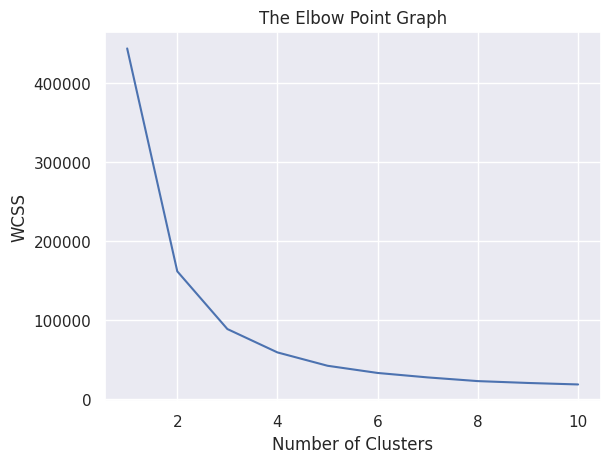

In [ ]:
# plot an elbow graph
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 6

In [ ]:
## Training K means Clustering

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(df)

In [ ]:
print(Y)

[5 1 1 0 5 2 1 4 3 0 0 0 2 5 0 5 1 4 4 3 3 5 0 5 5 5 0 5 3 5 5 3 5 4 2 2 2
 3 1 0 0 5 3 3 0 0 3 5 5 2 0 5 4 5 2 4 2 0 3 4 5 4 0 5 3 3 4 5 0 3 5 3 0 0
 4 4 4 2 5 5 0 4 0 3 4 2 2 5 5 2 5 4 5 0 1 2 3 5 3 3 3 5 1 4 1 5 1 3 5 5 1
 0 0 0 1 5 2 2 3 3 1 1 1 0 5 1 3 5 2 0 2 4 5 2 2 0 0 0 3 3 5 3 0 4 5 4 2 3
 2 1 5 3 5 0 3 1 5 3 2 3 5 2 0 0 1 1 0 2 2 5 5 2 2 5 0 1 0 2 3 1 5 3 0 5 0
 3 5 3 0 1 3 2 3 3 2 0 3 0 0 2 2 2 5 5 4 5 3 2 2 3 2 4 3 0 2 2 1 4 5 0 5 2
 3 2 5 0 5 0 5 1 3 4 2 2 2 5 3 3 0 2 3 2 0 0 5 5 5 5 3 0 0 2 5 5 0 5 5 2 5
 2 2 2 0 1 5 4 2 5 1 5 3 4 0 5 2 5 1 5 2 0 0 0 2 2 0 2 2 2 5 5 5 5 3 5 2 3
 4 5 0 2 2 0 2 5 2 5 2 0 5 0 2 3 3 5 5 3 2 5 5 3 2 2 2 0 4 1 3 4 5 0 3 4 0
 2 1 3 5 0 4 0 0 5 5 5 5 2 3 1 5 5 3 0 2 0 5 5 3 3 3 1 3 2 3 4 3 3 0 3 3 2
 5 5 5 1 5 4 2 1 2 3 2 1 5 0 4 5 5 5 3 5 3 5 3 0 5 4 3 1 3 0 3 4 3 1 3 5 3
 2 0 2 5 2 3 3 5 5 5 5 3 0 1 3 3 2 4 3 2 5 0 3 3 5 0 0 3 0 3 5 0 2 2 2 5 2
 2 5 3 2 4 5 2 1 5 0 3 0 1 0 1 3 0 0 5 1 3 1 4 3 2 5 1 5 2 3 1 2 3 5 3 5 5
 0 3 0 0 5 0 5 0 2 2 3 2 

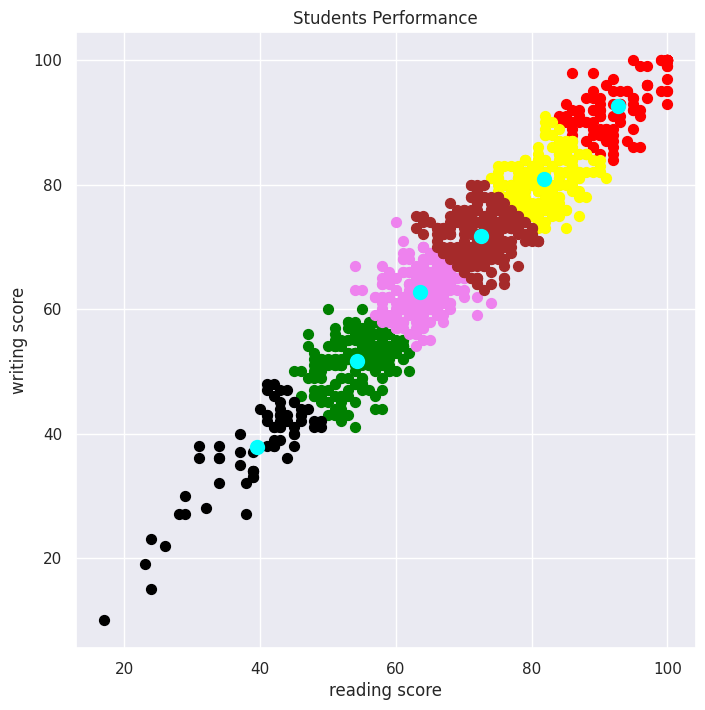

In [ ]:
## Visualizing all the clusters
import matplotlib.pyplot as plt

# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(df[Y==0,0], df[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(df[Y==1,0], df[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(df[Y==2,0], df[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(df[Y==3,0], df[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(df[Y==4,0], df[Y==4,1], s=50, c='black', label='Cluster 5')
plt.scatter(df[Y==5,0], df[Y==5,1], s=50, c='brown', label='Cluster 6')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Students Performance')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.show()

3. Implement a Python class called DecisionTree that can be trained on a
given dataset and used to make predictions on new input data.

In [ ]:
import numpy as np


class DecisionTree:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict(self, X):
        if self.tree is None:
            raise RuntimeError("Decision tree has not been trained. Call 'fit' before 'predict'.")

        predictions = []
        for sample in X:
            prediction = self.traverse_tree(sample, self.tree)
            predictions.append(prediction)
        return np.array(predictions)

    def build_tree(self, X, y):
        # Base case: check if all samples belong to the same class
        if len(np.unique(y)) == 1:
            return {'class': y[0]}

        num_samples, num_features = X.shape

        # Find the best feature and split point
        best_feature, best_split_point = self.find_best_split(X, y)

        # Base case: check if splitting the data does not improve purity
        if best_feature is None:
            return {'class': self.most_common_class(y)}

        # Split the data based on the best feature and split point
        left_mask = X[:, best_feature] <= best_split_point
        right_mask = X[:, best_feature] > best_split_point
        left_X, left_y = X[left_mask], y[left_mask]
        right_X, right_y = X[right_mask], y[right_mask]

        # Recursively build the left and right subtrees
        left_subtree = self.build_tree(left_X, left_y)
        right_subtree = self.build_tree(right_X, right_y)

        # Create a node representing the best feature and split point
        return {
            'feature': best_feature,
            'split_point': best_split_point,
            'left': left_subtree,
            'right': right_subtree
        }

    def find_best_split(self, X, y):
        best_feature = None
        best_split_point = None
        best_gini = 1.0

        num_samples, num_features = X.shape

        for feature in range(num_features):
            values = np.unique(X[:, feature])
            for value in values:
                left_mask = X[:, feature] <= value
                right_mask = X[:, feature] > value
                left_labels, right_labels = y[left_mask], y[right_mask]

                gini = self.calculate_gini(left_labels, right_labels)

                if gini < best_gini:
                    best_feature = feature
                    best_split_point = value
                    best_gini = gini

        return best_feature, best_split_point

    def calculate_gini(self, left_labels, right_labels):
        total_samples = len(left_labels) + len(right_labels)
        left_gini = self.calculate_impurity(left_labels)
        right_gini = self.calculate_impurity(right_labels)
        weighted_gini = (len(left_labels) / total_samples) * left_gini + (len(right_labels) / total_samples) * right_gini
        return weighted_gini

    def calculate_impurity(self, labels):
        _, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        impurity = 1.0 - np.sum(probabilities ** 2)
        return impurity

    def most_common_class(self, labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        most_common_index = np.argmax(counts)
        return unique_labels[most_common_index]

    def traverse_tree(self, sample, node):
        if 'class' in node:
            return node['class']

        feature = node['feature']
        split_point = node['split_point']

        if sample[feature] <= split_point:
            return self.traverse_tree(sample, node['left'])
        else:
            return self.traverse_tree(sample, node['right'])


In [ ]:
# Create an instance of the DecisionTree class
tree = DecisionTree()

# Generate a random dataset for demonstration
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.choice([0, 1], size=100)

# Train the decision tree
tree.fit(X, y)

# Make predictions on new data
new_data = np.random.randn(5, 2)
predictions = tree.predict(new_data)

print(predictions)


[0 1 0 1 0]


4. Write a Python function that takes a user&#39;s message as input and returns a response based on a predefined set of rules. For example, if the user asks
&quot;What is your name?&quot;, the function should return &quot;My name is Chatbot.&quot;
Implement a Python class called Chatbot that has methods for processing
user input, generating responses, and maintaining a conversation history.

In [ ]:
import random


class Chatbot:
    def __init__(self):
        self.history = []

    def process_input(self, user_input):
        self.history.append(user_input)
        response = self.generate_response(user_input)
        self.history.append(response)
        return response

    def generate_response(self, user_input):
        user_input = user_input.lower()

        if 'hello' in user_input or 'hi' in user_input:
            return "Hello! How can I assist you?"

        if 'your name' in user_input:
            return "My name is Chatbot."

        if 'how are you' in user_input:
            return "I'm doing well, thank you!"

        if 'bye' in user_input or 'goodbye' in user_input:
            return "Goodbye! Have a great day."

        return "I'm sorry, I didn't understand. Can you please rephrase your question?"

    def get_history(self):
        return self.history


In [ ]:
# Create an instance of the Chatbot class
chatbot = Chatbot()

# Process user input and get responses
response1 = chatbot.process_input("Hello")
response2 = chatbot.process_input("What is your name?")
response3 = chatbot.process_input("How are you today?")
response4 = chatbot.process_input("Goodbye")

# Get conversation history
history = chatbot.get_history()

# Print responses and conversation history
print(response1)
print(response2)
print(response3)
print(response4)
print(history)


Hello! How can I assist you?
My name is Chatbot.
I'm doing well, thank you!
Goodbye! Have a great day.
['Hello', 'Hello! How can I assist you?', 'What is your name?', 'My name is Chatbot.', 'How are you today?', "I'm doing well, thank you!", 'Goodbye', 'Goodbye! Have a great day.']


5. Implement a Python function that uses natural language processing
techniques to perform named entity recognition on a user&#39;s message and
extract relevant entities such as names, locations, or dates

In [ ]:
import spacy


def perform_ner(user_input):
    # Load the pre-trained English language model for NER
    nlp = spacy.load("en_core_web_sm")

    # Process the user's input
    doc = nlp(user_input)

    # Extract named entities
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

    return entities


In [ ]:
user_input = "I visited New York last year and had dinner with John."

entities = perform_ner(user_input)

for entity, label in entities:
    print("Entity:", entity)
    print("Label:", label)
    print()


Entity: New York
Label: GPE

Entity: last year
Label: DATE

Entity: John
Label: PERSON



6. Write a Python function that integrates with external APIs (such as
weather or news APIs) to provide real-time information in response to
user queries.

In [ ]:
import requests


def get_weather(city):
    # API endpoint and parameters
    url = "https://api.openweathermap.org/data/2.5/weather"
    api_key = "<Your API Key>"  # Replace with your actual API key
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric"  # You can adjust the units as per your preference
    }

    try:
        # Send a GET request to the weather API
        response = requests.get(url, params=params)
        data = response.json()

        # Extract relevant weather information
        weather_description = data["weather"][0]["description"]
        temperature = data["main"]["temp"]
        humidity = data["main"]["humidity"]

        # Create a response string with the weather information
        response_str = f"The weather in {city} is {weather_description}. "
        response_str += f"The temperature is {temperature}°C and the humidity is {humidity}%."

        return response_str

    except requests.exceptions.RequestException as e:
        # Handle API request errors
        print("Error occurred:", e)
        return "Sorry, an error occurred while retrieving the weather information."


# Example usage
city = "London"
weather_info = get_weather(city)
print(weather_info)
